In [3]:
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Set2_7

In [4]:
cs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
params = {
   'axes.labelsize': 16,
   'font.size': 14,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [7, 5],
   'hist.bins': 20,
}
rcParams = plt.rcParams
rcParams.update(params)
graph_dir = "graphs/"
cs = Set2_7.mpl_colors

## Mongodb

### workload

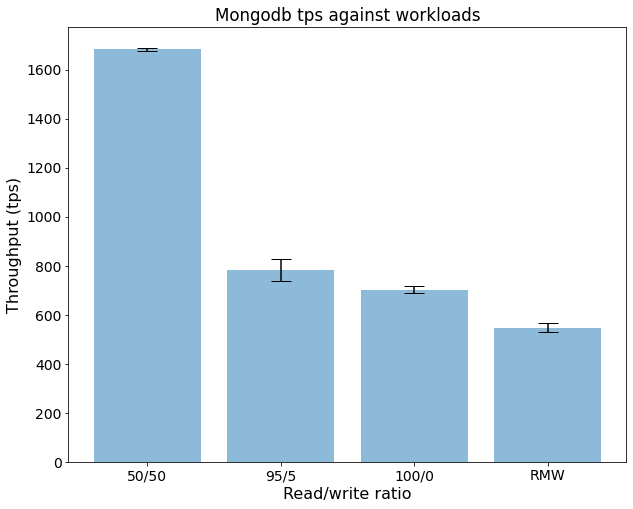

In [6]:
# 3 threads 100000 ops
workload_type = ['50/50', '95/5', '100/0', 'RMW']
# tps = [[5288, 5330, 5323], [5372,5537,5495], [5500,6338,6258], [3544, 3677,4084]]

tps = [[1688, 1674, 1688], [719,826,804], [685,704,720], [567, 521,553]]

tps = np.array([[np.mean(tp), np.std(tp)] for tp in tps])


fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(workload_type, tps[:,0], yerr=tps[:,1], align='center', alpha=0.5, 
       ecolor='black', capsize=10)
ax.set_ylabel('Throughput (tps)')
ax.set_xlabel('Read/write ratio')
ax.set_title('Mongodb tps against workloads')

fig.savefig('mongodb_tp_workload.jpg')

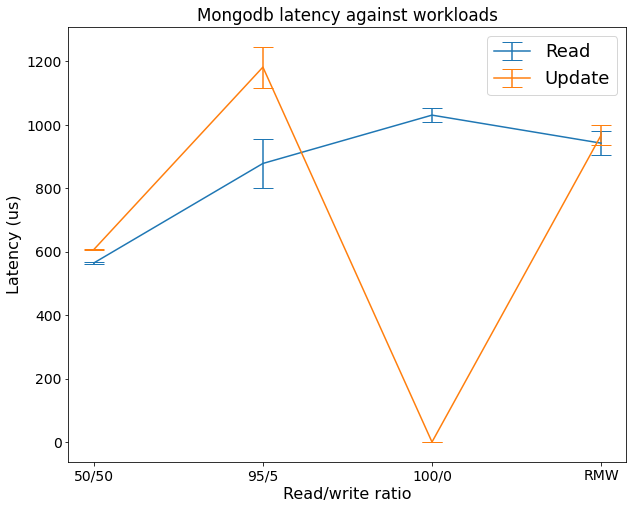

In [7]:
# ms 100000 ops
ops = 100000
# runtime = [[18783,18759,18909], [19127,18397,18730], [15979,15777,18179], [24485,27192,28216]] 

total_time = [[59215,59710,59212], [1390,1210,1243], [1458,1420,1387], [1763,1916,1808]]  # ms
read_lat = [[562,569,562], [987,808,839],[1052,1040,999],[905,993,928]]
update_lat = [[605,609,606], [1240,1092,1213], [0,0,0], [941,1010,950]]  # ms

read_lat = np.array([[np.mean(l), np.std(l)] for l in read_lat])
update_lat = np.array([[np.mean(l), np.std(l)] for l in update_lat])

# lat = [[rt / ops * 1000 for rt in rts] for rts in runtime] # us
# lat = np.array([[np.mean(l), np.std(l)] for l in lat])

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.errorbar(workload_type, read_lat[:,0], yerr=read_lat[:,1], capsize=10, label='Read')
ax.errorbar(workload_type, update_lat[:,0], yerr=update_lat[:,1],capsize=10, label='Update')
ax.set_ylabel('Latency (us)')
ax.set_xlabel('Read/write ratio')
ax.set_title('Mongodb latency against workloads')
ax.legend()

fig.savefig('mongodb_workload_lat.jpg')

### threads


Text(0.5, 0, 'Number of threads')

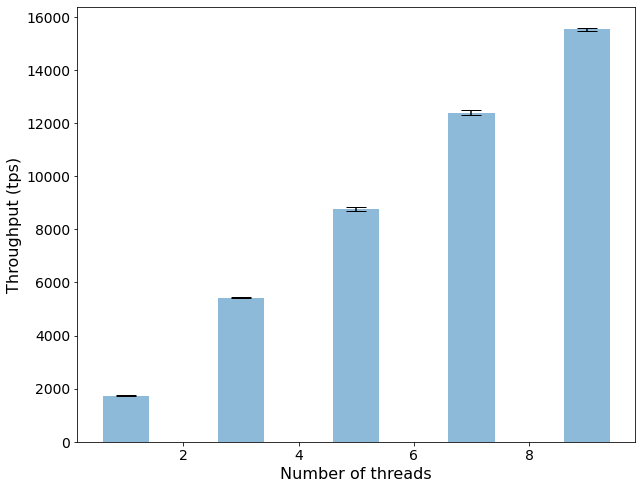

In [8]:
threads = [1, 3, 5, 7, 9]
tps = [[1762,1707,1727], [5402,5411,5474], [8684,8856,8802], [12271,12422,12512], [15571,15439,15586]]

tps = np.array([[np.mean(tp), np.std(tp)] for tp in tps])


fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(threads, tps[:,0], yerr=tps[:,1], align='center', alpha=0.5, 
       ecolor='black', capsize=10)
ax.set_ylabel('Throughput (tps)')
ax.set_xlabel('Number of threads')

Text(0.5, 0, 'Number of threads')

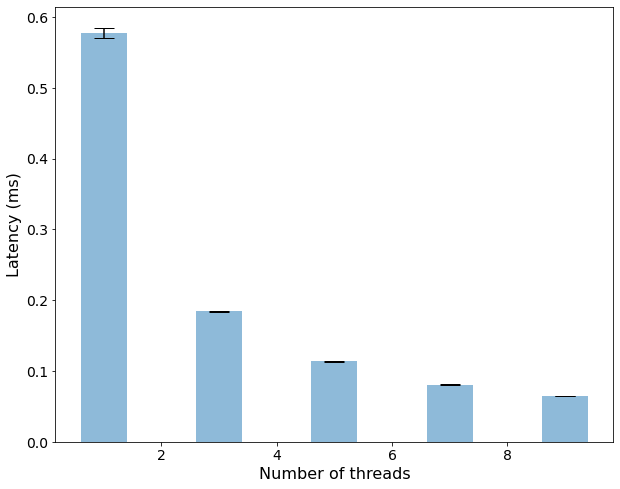

In [9]:
threads = [1, 3, 5, 7, 9]
runtime = [[56733,58577,57898],[18510,18480,18265],[11515,11291,11360],[8149,8050,7992],[6422,6477,6416]]

ops = 100000
lat = [[rt / ops for rt in rts] for rts in runtime]
lat = np.array([[np.mean(l), np.std(l)] for l in lat])

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(threads, lat[:,0], yerr=lat[:,1], align='center', alpha=0.5, 
       ecolor='black', capsize=10)
ax.set_ylabel('Latency (ms)')
ax.set_xlabel('Number of threads')


### Nodes

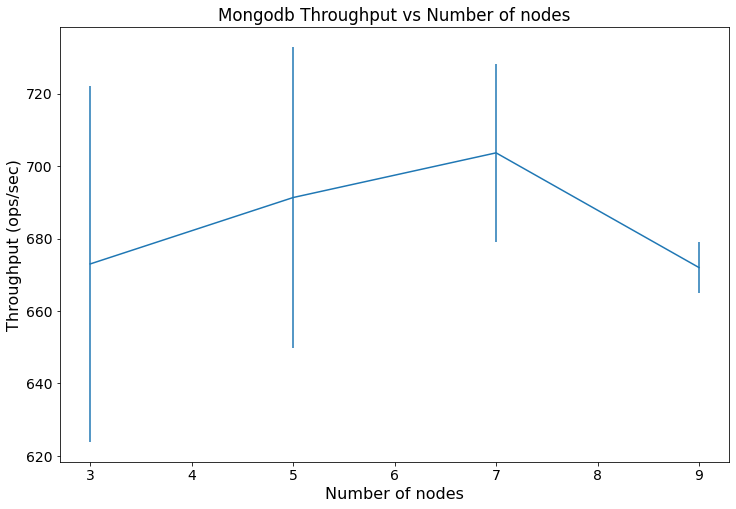

In [18]:
nodes = [3, 5, 7, 9]
tps = [[742, 646, 631], [692,742, 640],[721,721,669],[673,663,680]]
tps = np.array([[np.mean(tp), np.std(tp)] for tp in tps])

fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(nodes, tps[:, 0], yerr=tps[:, 1])
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Throughput (ops/sec)')
ax.set_title('Mongodb Throughput vs Number of nodes')

fig.savefig('mongodb_nodes_tps.jpg')


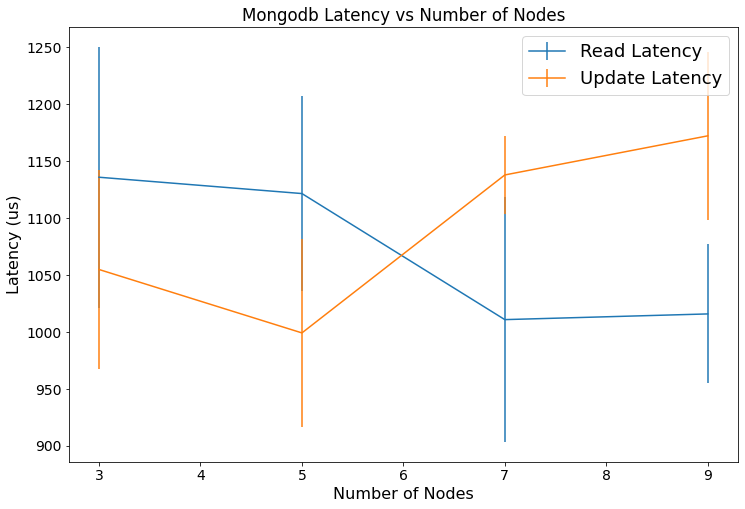

In [19]:
nodes = [3,5,7,9]
read_lat = [[978, 1182,1247], [1134, 1011,1219], [887,1149,996 ], [952,997,1098 ]]
update_lat = [[931,1119,1114], [983,907,1107], [1122,1106,1185], [1215,1233,1068]]

read_lat = np.array([[np.mean(l), np.std(l)] for l in read_lat])
update_lat = np.array([[np.mean(l), np.std(l)] for l in update_lat])

fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(nodes, read_lat[:,0], yerr=read_lat[:,1], label="Read Latency")
ax.errorbar(nodes, update_lat[:,0], yerr=update_lat[:,1], label="Update Latency")
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Latency (us)")
ax.set_title("Mongodb Latency vs Number of Nodes")
ax.legend()

fig.savefig("mongodb_members_lat.jpg")


## Mnesia

### workload

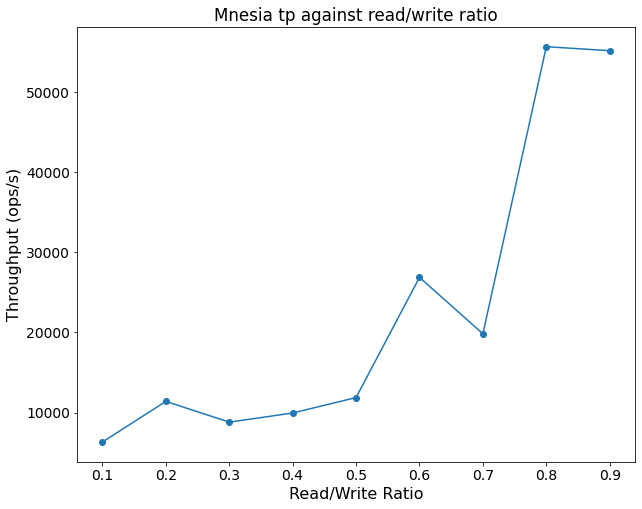

In [11]:
# 1 client, 3 nodes


rw_ratio = [i * 0.1 for i in range(1, 10)]
tps = [6330, 11401,8811,9948,11878,26866,19832,55635,55134,1167570]
tps = tps[:len(rw_ratio)]

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.plot(rw_ratio, tps, marker='o')
ax.set_xlabel('Read/Write Ratio')
ax.set_ylabel('Throughput (ops/s)')

ax.set_title('Mnesia tp against read/write ratio')
fig.savefig('mnesia_workload_tp.jpg')

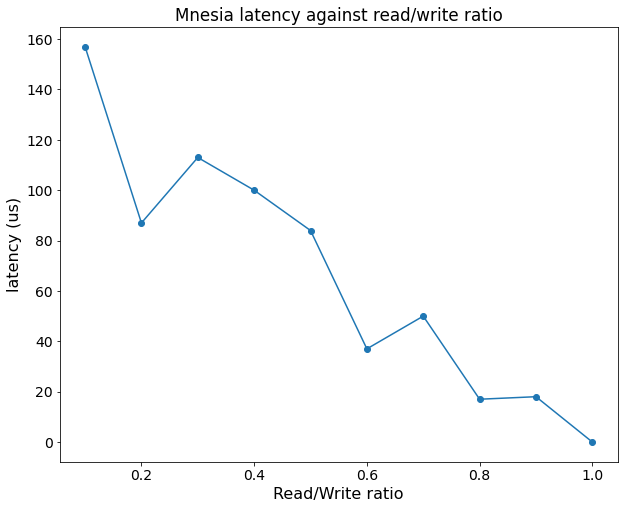

In [12]:
rw_ratio = [i * 0.1 for i in range(1, 11)]
ec_lat = [157,87,113,100,84,37,50,17,18,0]

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.plot(rw_ratio, ec_lat, marker='o')
ax.set_ylabel('latency (us)')
ax.set_xlabel('Read/Write ratio')

ax.set_title('Mnesia latency against read/write ratio')
fig.savefig('mnesia_workload_lat.jpg')

### nodes

## Postgresql

### workload

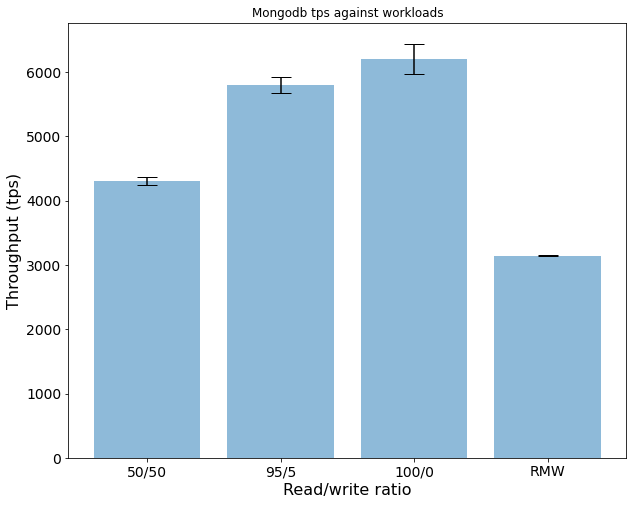

In [6]:
# 3 threads 100000 ops
workload_type = ['50/50', '95/5', '100/0', 'RMW']

tps = [[4268, 4262, 4396], [5637,5799,5953], [6314,5888,6429], [3144, 3134,3148]]

tps = np.array([[np.mean(tp), np.std(tp)] for tp in tps])


fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(workload_type, tps[:,0], yerr=tps[:,1], align='center', alpha=0.5, 
       ecolor='black', capsize=10)
ax.set_ylabel('Throughput (tps)')
ax.set_xlabel('Read/write ratio')
ax.set_title('Mongodb tps against workloads')

fig.savefig('postgresql_tp_workload.jpg')

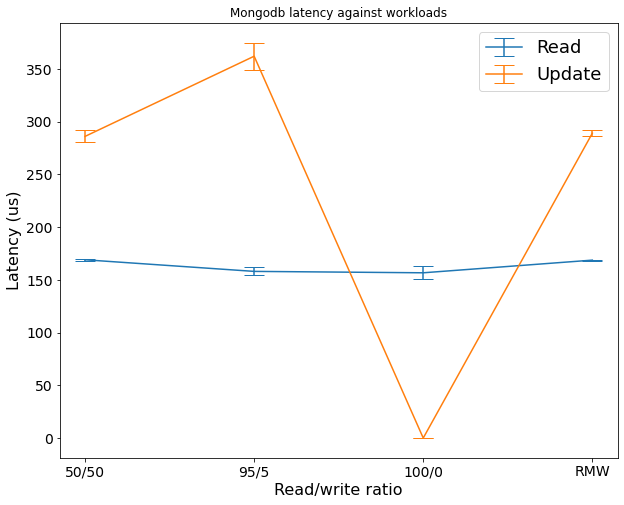

In [5]:
# ms 100000 ops
ops = 100000

total_time = [[23428,23462,22743], [15836,17242,16797], [16981,15836,15554], [31906,1916,31761]]  # ms
read_lat = [[170,169,168], [163,157,154],[154,165,151],[169,168,169]]
update_lat = [[289,291,278], [369,373,344], [0,0,0], [287,293,287]]  # ms

read_lat = np.array([[np.mean(l), np.std(l)] for l in read_lat])
update_lat = np.array([[np.mean(l), np.std(l)] for l in update_lat])

# lat = [[rt / ops * 1000 for rt in rts] for rts in runtime] # us
# lat = np.array([[np.mean(l), np.std(l)] for l in lat])

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.errorbar(workload_type, read_lat[:,0], yerr=read_lat[:,1], capsize=10, label='Read')
ax.errorbar(workload_type, update_lat[:,0], yerr=update_lat[:,1],capsize=10, label='Update')
ax.set_ylabel('Latency (us)')
ax.set_xlabel('Read/write ratio')
ax.set_title('Mongodb latency against workloads')
ax.legend()

fig.savefig('postgresql_workload_lat.jpg')

## Combined

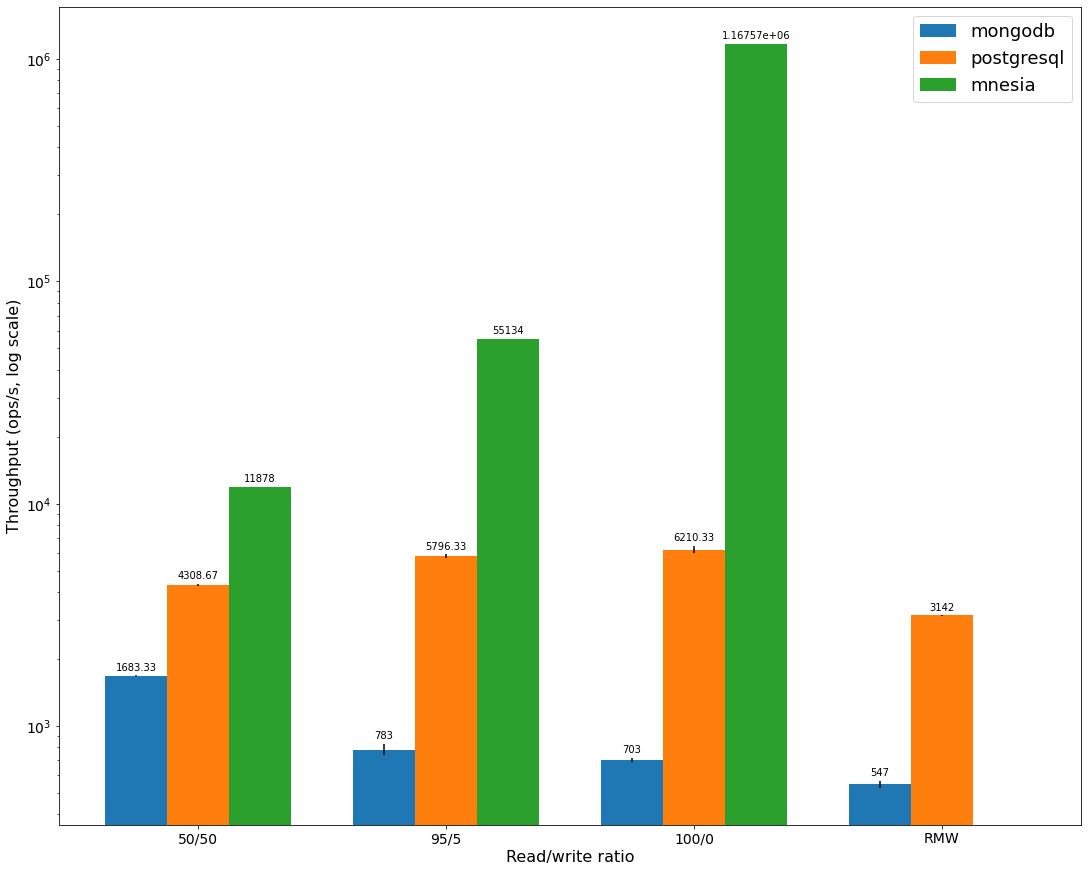

In [11]:
workload_type = ['50/50', '95/5', '100/0', 'RMW']

mongodb_tps = [[1688, 1674, 1688], [719, 826, 804],
               [685, 704, 720], [567, 521, 553]]
mongodb_tps = np.array([[np.mean(tp), np.std(tp)] for tp in mongodb_tps])

postgres_tps = [[4268, 4262, 4396], [5637, 5799, 5953],
                [6314, 5888, 6429], [3144, 3134, 3148]]
postgres_tps = np.array([[np.mean(tp), np.std(tp)] for tp in postgres_tps])

rw_ratio = [i * 0.1 for i in range(1, 10)]
mnesia_tps = [6330, 11401, 8811, 9948, 11878,
              26866, 19832, 55635, 55134, 1167570]
mnesia_tps = np.array([[11878, 0], [55134, 0], [1167570,0], [0, 0]])

tps = {
    'mongodb': mongodb_tps,
    'postgresql': postgres_tps,
    'mnesia': mnesia_tps
}
x = np.arange(len(workload_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(15, 12)

for db, tps in tps.items():
       offset = width * multiplier
       rects = ax.bar(x + offset, tps[:, 0], yerr=tps[:, 1], width=width, label=db, log=True)
       ax.bar_label(rects, padding=3)
       multiplier += 1



ax.set_ylabel('Throughput (ops/s, log scale)')
ax.set_xticks(x + width, workload_type)
ax.set_xlabel('Read/write ratio')
ax.legend()

fig.savefig('tp_workload.jpg')


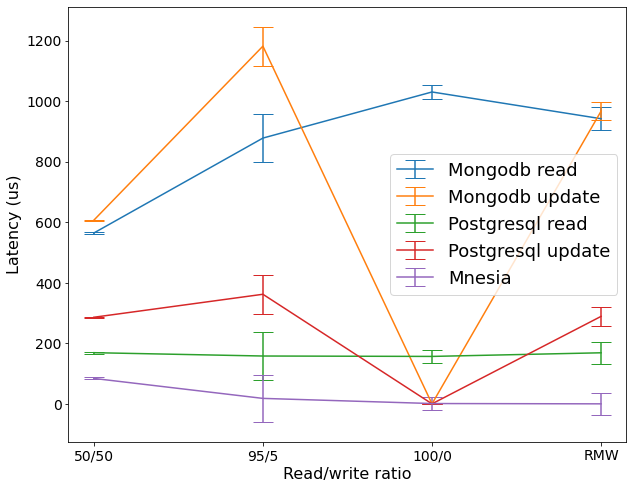

In [14]:
# ms 100000 ops
ops = 100000
workload_type = ['50/50', '95/5', '100/0', 'RMW']

total_time = [[59215, 59710, 59212], [1390, 1210, 1243],
              [1458, 1420, 1387], [1763, 1916, 1808]]  # ms
mongodb_read_lat = [[562, 569, 562], [987, 808, 839],
                    [1052, 1040, 999], [905, 993, 928]]
mongodb_update_lat = [[605, 609, 606], [
    1240, 1092, 1213], [0, 0, 0], [941, 1010, 950]]  # ms

mongodb_read_lat = np.array([[np.mean(l), np.std(l)]
                            for l in mongodb_read_lat])
mongodb_update_lat = np.array([[np.mean(l), np.std(l)]
                              for l in mongodb_update_lat])


rw_ratio = [i * 0.1 for i in range(1, 11)]
mnesia_ec_lat = [157, 87, 113, 100, 84, 37, 50, 17, 18, 0]
mnesia_ec_lat = np.array([[84, 0], [18, 0], [1, 0], [0, 0]])


total_time = [[23428, 23462, 22743], [15836, 17242, 16797],
              [16981, 15836, 15554], [31906, 1916, 31761]]  # ms
postgres_read_lat = [[170, 169, 168], [
    163, 157, 154], [154, 165, 151], [169, 168, 169]]
postgres_update_lat = [[289, 291, 278], [
    369, 373, 344], [0, 0, 0], [287, 293, 287]]  # ms

postgres_read_lat = np.array([[np.mean(l), np.std(l)]
                             for l in postgres_read_lat])
postgres_update_lat = np.array(
    [[np.mean(l), np.std(l)] for l in postgres_update_lat])

lat = {
    'mongodb': [mongodb_read_lat, mongodb_update_lat],
    'postgresql': [postgres_read_lat, postgres_update_lat],
    'mnesia': [mnesia_ec_lat]
}

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.errorbar(workload_type, lat['mongodb'][0][:, 0],
            yerr=lat['mongodb'][0][:, 1], capsize=10, label='Mongodb read')
ax.errorbar(workload_type, lat['mongodb'][1][:, 0],
            yerr=lat['mongodb'][1][:, 1], capsize=10, label='Mongodb update')
ax.errorbar(workload_type, lat['postgresql'][0][:, 0],
            yerr=lat['mongodb'][0][:, 1], capsize=10, label='Postgresql read')
ax.errorbar(workload_type, lat['postgresql'][1][:, 0],
            yerr=lat['mongodb'][1][:, 1], capsize=10, label='Postgresql update')
ax.errorbar(workload_type, lat['mnesia'][0][:, 0],
            yerr=lat['mongodb'][0][:, 1], capsize=10, label='Mnesia')

ax.set_ylabel('Latency (us)')
ax.set_xlabel('Read/write ratio')
ax.legend()

fig.savefig('lat_workload.jpg')
